# Traitement des données W43-MM1 N2H+ 7M+12M isolated continum substracted crop

In [1]:
%pylab inline
from astropy.io import fits
import aplpy
from pywavan import fbm2d, powspec, fan_trans
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [61]:
from pywavan import subfits

***
# Verification des données enregistré

In [111]:
im_g = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/coh.npy")

Text(0.5, 1.0, 'Coherent')

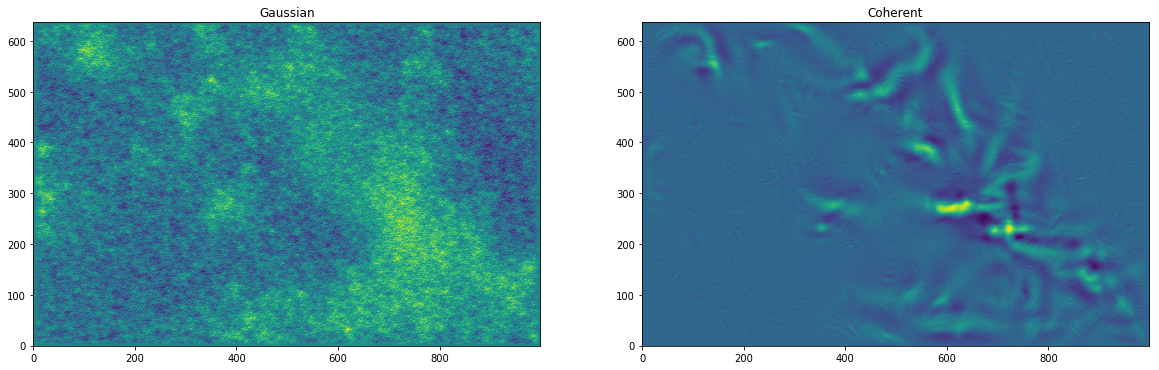

In [4]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_g[23].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[23].real,origin="lower")
title('Coherent')

***
4 image de la partie cohérente à différente partie du cube de donnée

In [5]:
im_ng.shape

(48, 637, 999)

Text(0.5, 1.0, 'canal 40')

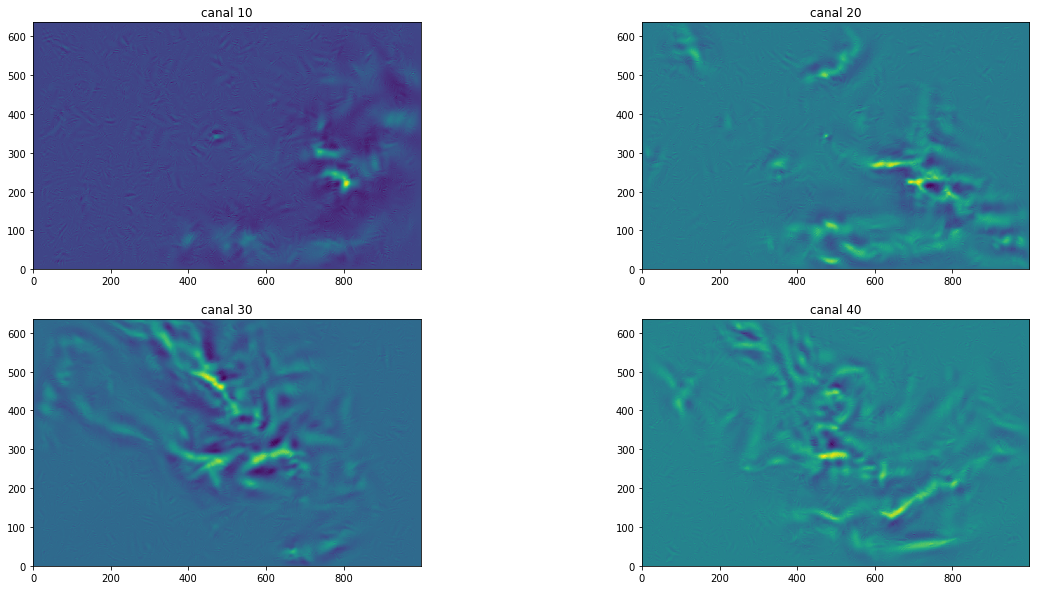

In [7]:
figure(figsize=(20,10))

subplot(2,2,1)
imshow(im_ng[10].real,origin="lower")
title('canal 10')

subplot(2,2,2)
imshow(im_ng[20].real,origin="lower")
title('canal 20')

subplot(2,2,3)
imshow(im_ng[30].real,origin="lower")
title('canal 30')

subplot(2,2,4)
imshow(im_ng[40].real,origin="lower")
title('canal 40')

***
# Ecriture des données en fichier fits

In [150]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [9]:
fits.writeto("/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng.fits",im_ng.real, header) 

In [10]:
fits.writeto("/user/workdir/soldanof/data/w43_7_12_iso_cnts/gau.fits",im_g.real, header) 

***
# Traitement des fichier créé

Trace d'une image

INFO: Auto-setting vmin to -1.151e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.218e-02 [aplpy.core]


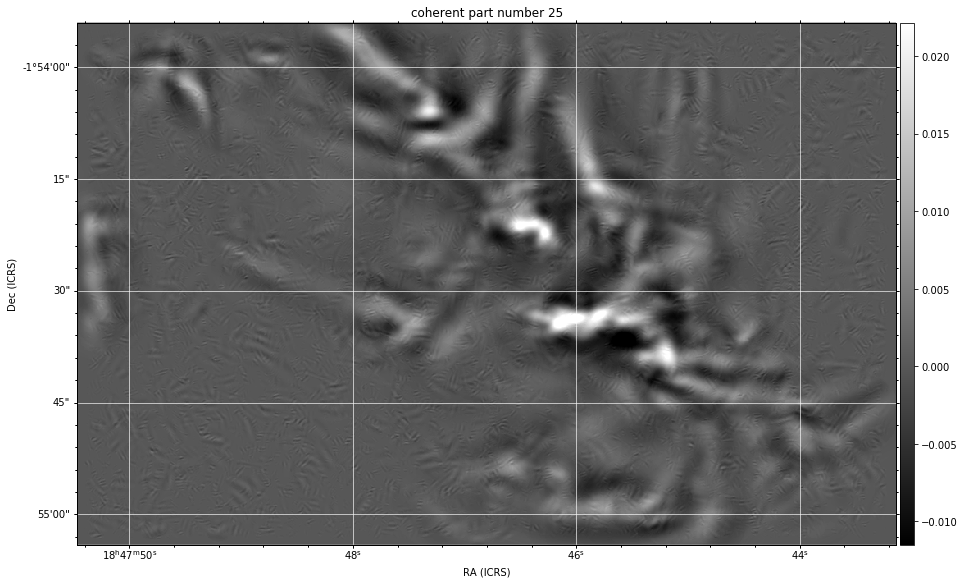

In [11]:
fig_all = plt.figure(1, figsize=(15,15))
nbr = 25
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part number {}".format(nbr))

INFO: Auto-setting vmin to -1.007e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.276e-02 [aplpy.core]


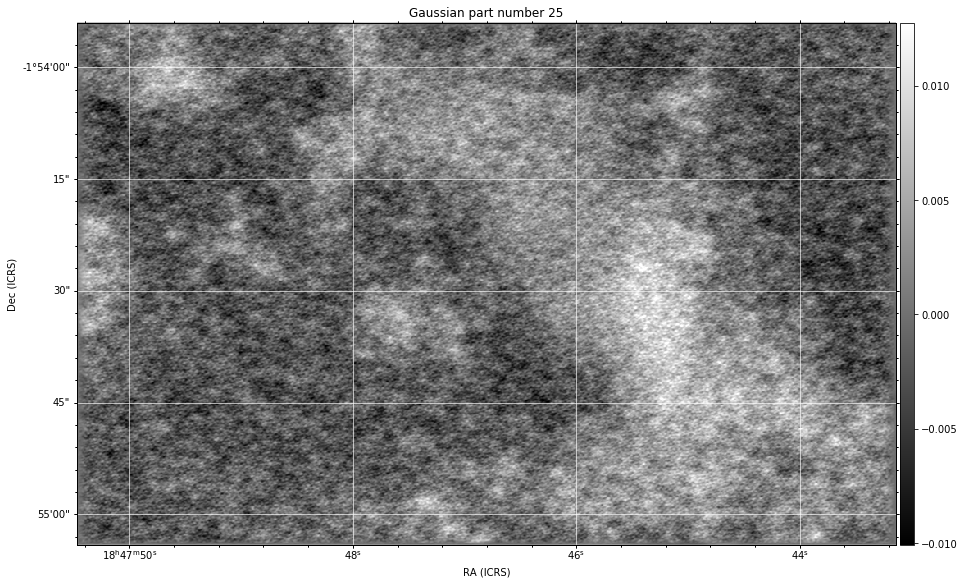

In [12]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/gau.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("Gaussian part number {}".format(nbr))

***
Trace Freq en fonction de Ra pour la partie gaussienne et la partie cohérente

INFO: Auto-setting vmin to -1.085e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.048e-02 [aplpy.core]


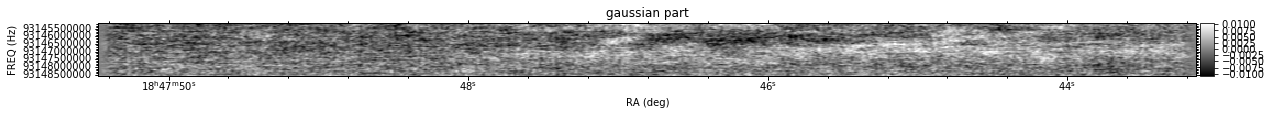

In [154]:
fig_all = plt.figure(1, figsize=(20,20))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/gau.fits",figure=fig_all,dimensions=[0,2],slices=[100])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.set_title("gaussian part")

INFO: Auto-setting vmin to -1.519e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.743e-02 [aplpy.core]


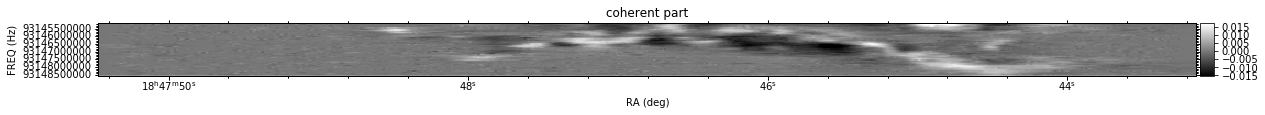

In [155]:
fig_all = plt.figure(1, figsize=(20,20))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng.fits",figure=fig_all,dimensions=[0,2],slices=[250])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.set_title("coherent part")

***
# creation carte intégré (moment 0)

In [18]:
im_ng.shape

(48, 637, 999)

In [112]:
im_ng_int = np.sum(im_ng,axis=0)
im_g_int = np.sum(im_g,axis=0)

Text(0.5, 1.0, 'moment 0 gaussien')

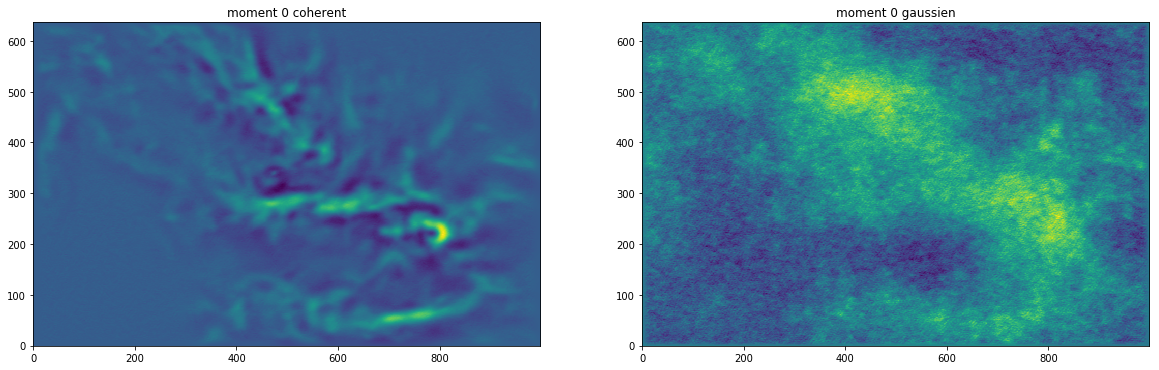

In [117]:
figure(figsize=(20,10))
subplot(121)
imshow(im_ng_int.real,origin="lower")
title('moment 0 coherent')
subplot(122)
imshow(im_g_int.real,origin="lower")
title('moment 0 gaussien')

In [82]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
im_tot_int = np.sum(cube,axis=0)

Text(0.5, 1.0, 'moment 0 original cube')

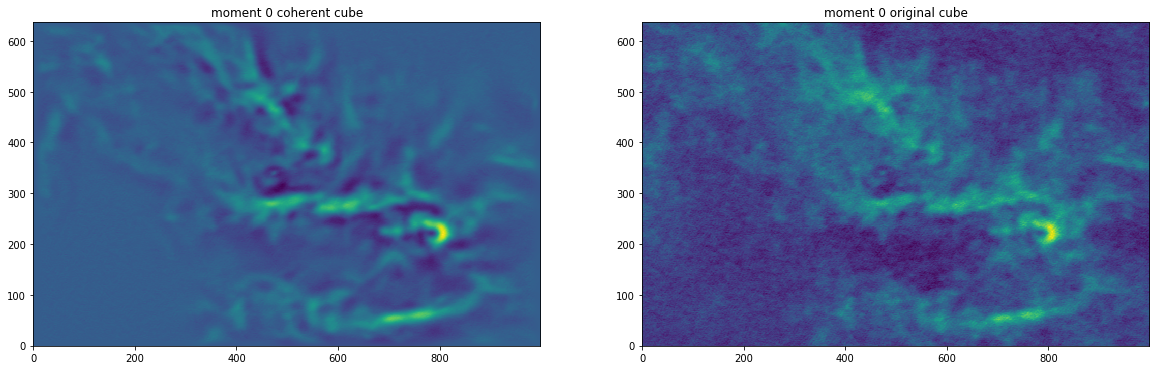

In [83]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_ng_int.real,origin="lower")
title('moment 0 coherent cube')

subplot(1,2,2)
imshow(im_tot_int.real,origin="lower")
title('moment 0 original cube') 

In [27]:
del header['NAXIS3']
del header['PC3_1']
del header['PC3_2']
del header['PC1_3']
del header['PC2_3']
del header['PC3_3']
del header['CTYPE3']
del header['CRVAL3']
del header['CDELT3']
del header['CRPIX3']
del header['CUNIT3']

In [28]:
header['NAXIS']=2
fits.writeto("/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng_t.fits",im_ng_int.real, header,overwrite= True) 

INFO: Auto-setting vmin to -1.364e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.543e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.742e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.254e-01 [aplpy.core]


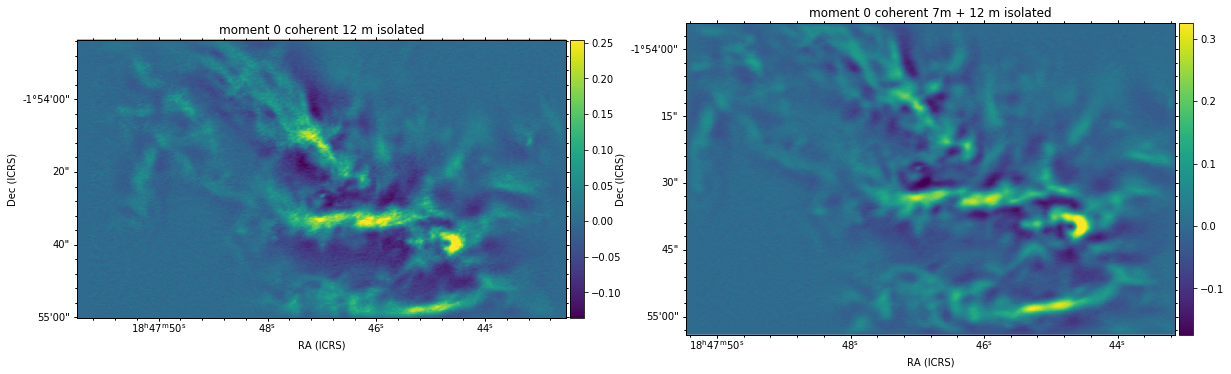

In [135]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 12 m isolated")


f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 7m + 12 m isolated")

INFO: Auto-setting vmin to -1.788e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.301e-01 [aplpy.core]


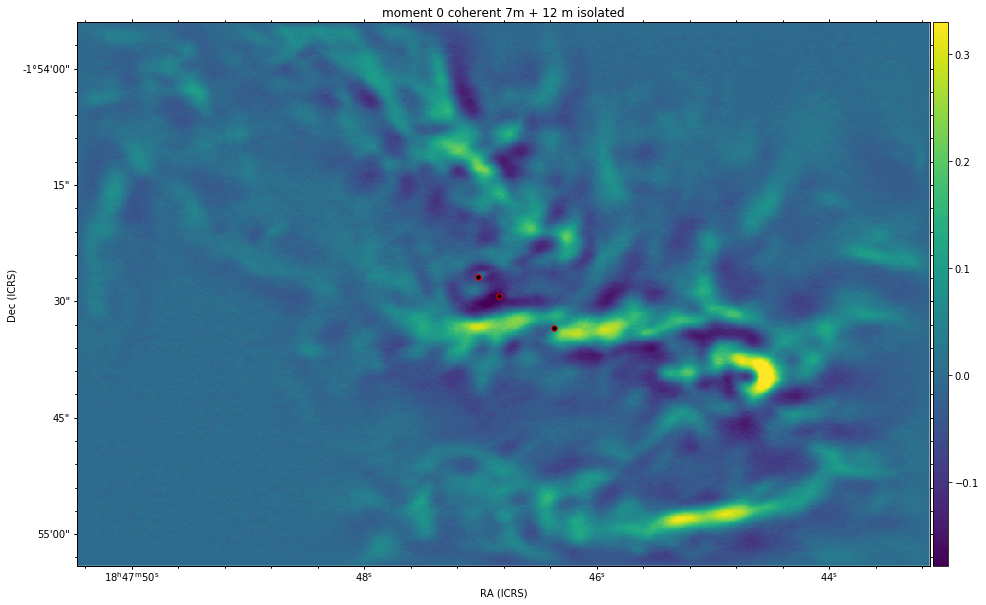

In [134]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng_t.fits",figure=fig_vel)  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 7m + 12 m isolated")
f.show_markers(sky1[0],sky1[1],coords_frame='pixel',facecolor='k')
f.show_markers(sky2[0],sky2[1],coords_frame='pixel',facecolor='k')
f.show_markers(sky3[0],sky3[1],coords_frame='pixel',facecolor='k')

***
pywavan on moment 0 map

In [85]:
from pywavan import nb_scale
reso = header ['CDELT2']*60
M = nb_scale(( 1024,1400))
q = []
q= [2.0]*nb_scale(( 1024,1400))

wt, S11a, wave_k, S1a, q =  fan_trans(im_tot_int, reso=reso, angular=False,q=q,apodize = 0.98,arrdim = np.array([ 1024,1400]))

coherent = np.sum(wt[M:2*M,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 

1400 1024


100%|██████████| 25/25 [02:55<00:00,  7.02s/it]


Text(0.5, 1.0, ' moment 0 + Coherent')

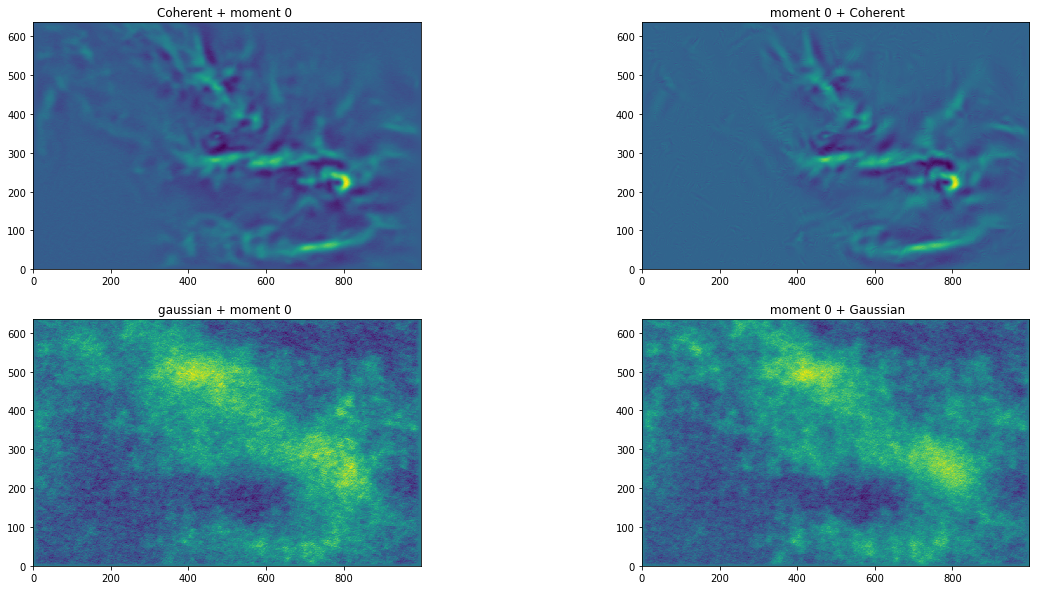

In [87]:
figure(figsize=(20,10))

subplot(221)
imshow(im_ng_int.real,origin="lower")
title('Coherent + moment 0 ')

subplot(223)
imshow(im_g_int.real,origin="lower")
title('gaussian + moment 0 ')

subplot(224)
imshow(Gaussian.real,origin="lower")
title(' moment 0 + Gaussian')

subplot(2,2,2)
imshow(coherent.real,origin="lower")
title(' moment 0 + Coherent')

***
# Moment 1

In [48]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [36]:
im_g = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/coh.npy")

In [34]:

im_ng = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/coh.npy")
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
N = header['NAXIS3']

for i in range(N):
    cube[i,:,:] -= np.mean(cube[i,:,:])
    #im_ng[i,:,:] += np.mean(cube[i,:,:])
    
    moy = (cube[i,:,:]).mean()
    im_ad = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    im_ad[np.abs(im_ng_2d)>=np.abs(cube[i,5:200,5:200]).mean()] = moy
    im_ng[i,:,:] = im_ng[i,:,:] + im_ad
    
    
    im_rmv = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    im_rmv[(im_ng_2d)<=np.abs(cube[i,:,:]).mean()] = np.nan
    im_ng[i,:,:] = im_ng[i,:,:] + im_rmv

In [131]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
N = header['NAXIS3']

for i in range(N):  
    im_rmv = np.zeros((cube.shape[1],cube.shape[2]))
    im_2d = cube[i,:,:]
    im_rmv[(im_2d)<=5*np.abs(cube[i,5:200,5:200]).mean()] = np.nan
    cube[i,:,:] = cube[i,:,:] + im_rmv

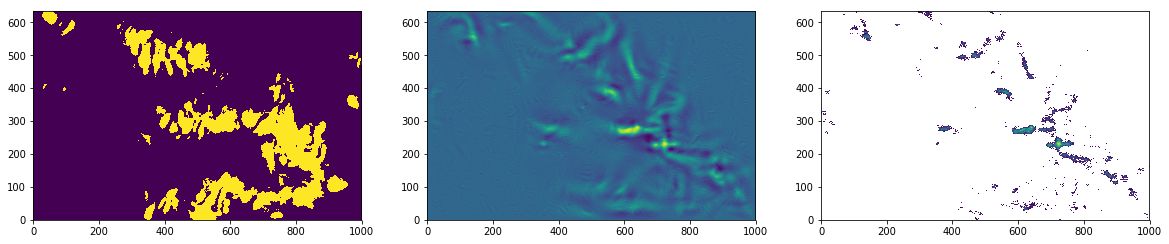

In [130]:
figure(figsize=(20,20))
subplot(131)
imshow(im_ad.real,origin="lower")

subplot(132)
imshow(im_ng[23].real,origin="lower")

subplot(133)
imshow(cube[23].real,origin="lower")

In [132]:
fits.writeto("/user/homedir/soldanof/cube_w43_7_12_mean_M_pos.fits",cube.real, header, overwrite = True) 

In [58]:
cohS=np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/cohScale.npy")
scale = cohS[1].shape[0]
iscale=int(scale/2)

HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
N = header['NAXIS3']

for j in range(12,13):
    im_ng=[]
    print("create cube",j)
    for i in range(N):
        
        im = cohS[i]
        imNG = np.sum(im[j:(scale-2),:,:], axis=0)
        im_ng.append(imNG)
    im_ng = np.array(im_ng)    
    print("clean cube")
    for i in range(N):
        
        cube[i,:,:] -= np.mean(cube[i,:,:])
        #im_ng[i,:,:] += np.mean(cube[i,:,:])
        
        moy = (cube[i,:,:]).mean()
        im_ad = np.zeros((im_ng.shape[1],im_ng.shape[2]))
        im_ng_2d = im_ng[i,:,:]
        im_ad[np.abs(im_ng_2d)>=np.abs(cube[i,5:200,5:200]).mean()] = moy
        im_ng[i,:,:] = im_ng[i,:,:] + im_ad
        
        
        im_rmv = np.zeros((im_ng.shape[1],im_ng.shape[2]))
        im_ng_2d = im_ng[i,:,:]
        im_rmv[(im_ng_2d)<=np.abs(cube[i,:,:]).mean()] = np.nan
        im_ng[i,:,:] = im_ng[i,:,:] + im_rmv
    fits.writeto("/user/homedir/soldanof/ng_w43_7_12{}.fits".format(j),im_ng.real, header, overwrite = True) 

create cube 12
clean cube


In [56]:
from pywavan import subfits
input1 = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop-0.015pix-mom1.fits'
output = '/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop-0.015pix-mom1_cut.fits'
coord = np.array([1036,1165,2034,1801])
subfits(input1,output,coord)

Dimensions 999 637


In [66]:
input1 = '/user/homedir/soldanof/ng_w43_7_1212.fits'
output = '/user/homedir/soldanof/ng_w43_7_1212_cut.fits'
coord = np.array([296,195,0,682,434,47])
subfits(input1,output,coord)

Dimensions 387 240 48


***

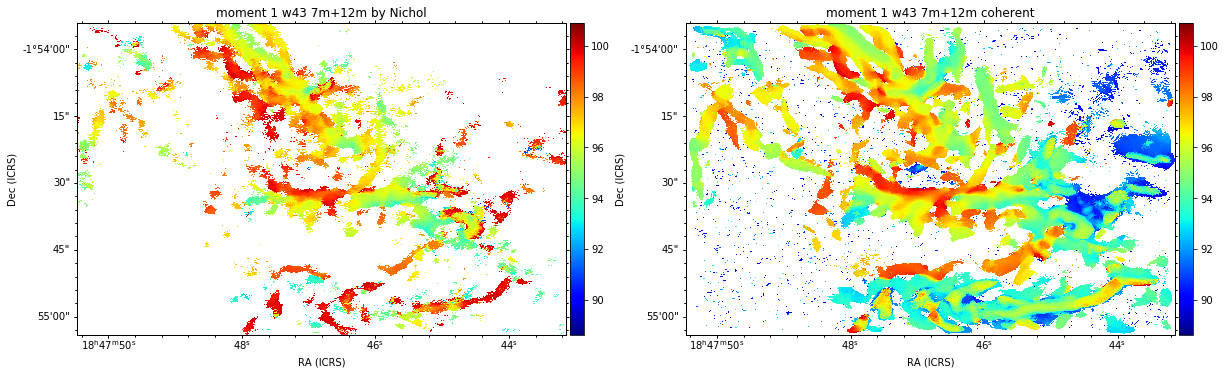

In [133]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop-0.015pix-mom1_cut.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet', vmin = 8.863e+01, vmax=1.009e+02)
f.add_colorbar()
f.set_title("moment 1 w43 7m+12m by Nichol")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/moment1_w43_7_12_isolat_mean_M3_pos.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'jet', vmin = 8.863e+01, vmax=1.009e+02)
f.add_colorbar()
f.set_title("moment 1 w43 7m+12m coherent")

INFO: Auto-setting vmin to  8.860e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.011e+02 [aplpy.core]
INFO: Auto-setting vmin to  8.861e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.010e+02 [aplpy.core]


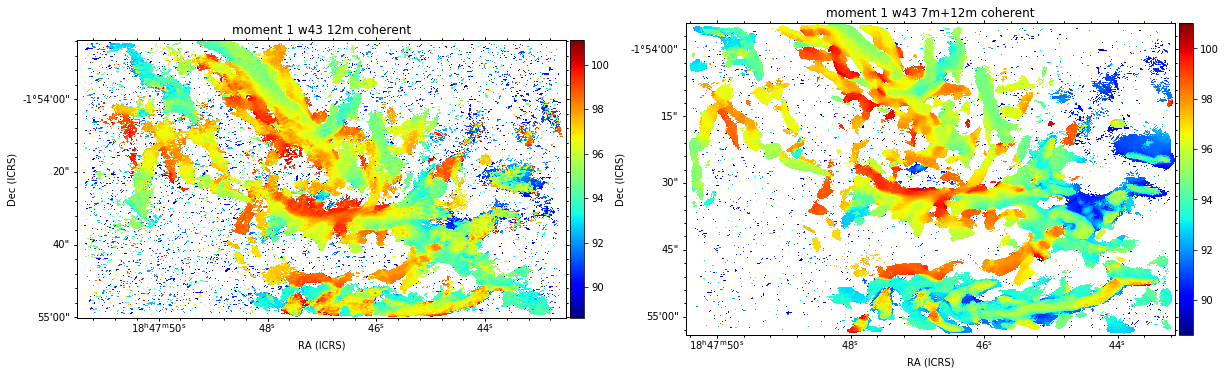

In [27]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_12_iso_cnts/moment1_w43_12_isolat_mean_M2_pos.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet')
f.add_colorbar()
f.set_title("moment 1 w43 12m coherent")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/moment1_w43_7_12_isolat_mean_M3_pos.fits",figure=fig_vel,subplot=(1,2,2))  

f.show_colorscale(cmap = 'jet')
f.add_colorbar()
f.set_title("moment 1 w43 7m+12m coherent")

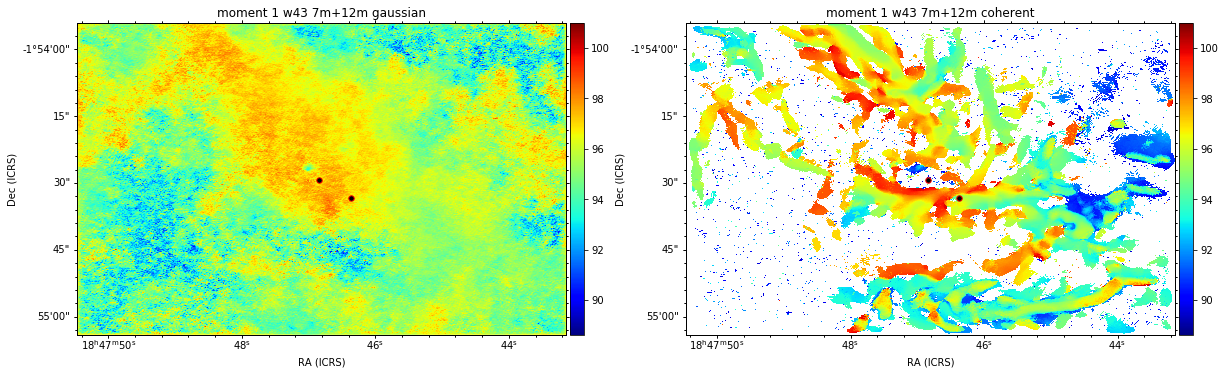

In [119]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/moment1_g_w43_7_12_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet', vmin = 8.862e+01, vmax=1.010e+02)
f.add_colorbar()
f.set_title("moment 1 w43 7m+12m gaussian")
#f.show_markers(sky1[0],sky1[1],coords_frame='pixel',facecolor='k')
f.show_markers(sky2[0],sky2[1],coords_frame='pixel',facecolor='k')
f.show_markers(sky3[0],sky3[1],coords_frame='pixel',facecolor='k')

f = aplpy.FITSFigure("/user/workdir/soldanof/data/w43_7_12_iso_cnts/moment1_w43_7_12_isolat_mean_M3_pos.fits",figure=fig_vel,subplot=(1,2,2))  

f.show_colorscale(cmap = 'jet', vmin = 8.862e+01, vmax=1.010e+02)
f.add_colorbar()
f.set_title("moment 1 w43 7m+12m coherent")
#f.show_markers(sky1[0],sky1[1],coords_frame='pixel',facecolor='k')
f.show_markers(sky2[0],sky2[1],coords_frame='pixel',facecolor='k')
f.show_markers(sky3[0],sky3[1],coords_frame='pixel',facecolor='k')

In [99]:
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic

In [103]:
HDU = fits.open("/user/workdir/soldanof/data/w43_12_iso_cnts/moment1_w43_12_isolat_mean_M2_pos.fits")
cube = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)

if w.wcs.has_crota() == True:
	del header['CROTA1']
	del header['CROTA2']
	del header['CROTA3']

w = wcs.WCS(header)

p1 = SkyCoord('18:47:50.402 -1:54:56.945', unit=(u.hourangle, u.deg))
skyp1 = w.world_to_pixel(p1)[0:2]
x1= int(skyp1[0])
y1= int(skyp1[1])

p2 = SkyCoord('18:47:43.355 -1:53:57.548', unit=(u.hourangle, u.deg))
skyp2 = w.world_to_pixel(p2)[0:2]
x2= int(skyp2[0])
y2= int(skyp2[1])

input1 = '/user/workdir/soldanof/data/w43_12_iso_cnts/moment1_w43_12_isolat_mean_M2_pos.fits'
output = '/user/workdir/soldanof/data/w43_12_iso_cnts/moment1_w43_12_isolat_mean_M2_pos_cut.fits'
coord = np.array([x1,y1,x2,y2])
subfits(input1,output,coord)

Dimensions 961 541


Text(0.5, 1.0, 'W43 comparaison between 12m and 7+12M')

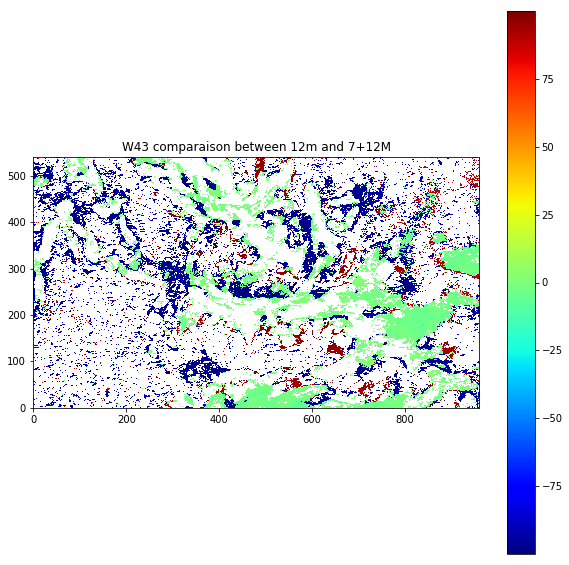

In [3]:
HDU = fits.open("/user/workdir/soldanof/data/w43_7_12_iso_cnts/moment1_w43_7_12_isolat_mean_M3_pos_cut.fits")
cube_7_12 = HDU[0].data
cube_7_12[np.isnan(cube_7_12)]=0
header = HDU[0].header

HDU = fits.open("/user/workdir/soldanof/data/w43_12_iso_cnts/moment1_w43_12_isolat_mean_M2_pos_cut.fits")
cube_12 = HDU[0].data
cube_12[np.isnan(cube_12)]=0
header = HDU[0].header

diff = cube_7_12-cube_12
diff[np.abs(diff)<0.5]=np.nan
figure(figsize=(10,10))
imshow(diff,origin="lower",cmap='jet')
colorbar()
title("W43 comparaison between 12m and 7+12M")

Text(0.5, 1.0, 'W43 comparaison between 7+12M coherent and original by Nichol')

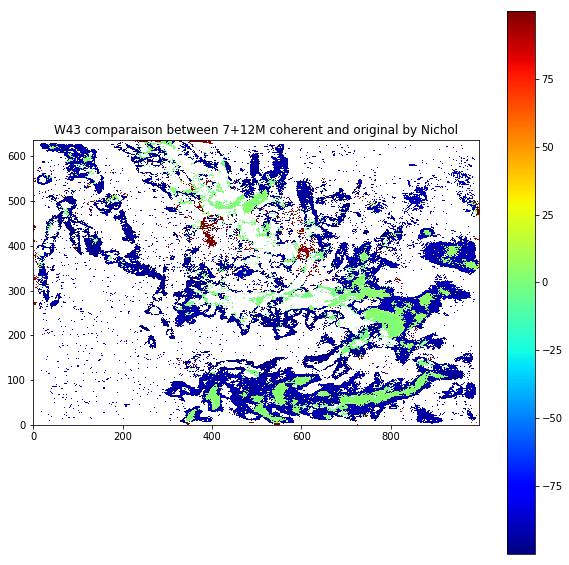

In [136]:
HDU = fits.open("/user/workdir/soldanof/data/w43_7_12_iso_cnts/moment1_w43_7_12_isolat_mean_M3_pos.fits")
cube_7_12 = HDU[0].data
cube_7_12[np.isnan(cube_7_12)]=0
header = HDU[0].header

HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1/W43-MM1_B3_spw0_7M12M_n2hp.image-isolated-contsub-crop-0.015pix-mom1_cut.fits")
cube_12 = HDU[0].data
cube_12[np.isnan(cube_12)]=0
header = HDU[0].header

diff = cube_12-cube_7_12
diff[np.abs(diff)<0.5]=np.nan
figure(figsize=(10,10))
imshow(diff,origin="lower",cmap='jet')
colorbar()
title("W43 comparaison between 7+12M coherent and original by Nichol")

***
# Traitement des donnée du spectre de puissance

In [170]:
t = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1at.npy")
g = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/s1ang.npy")
w_k = np.load("/user/workdir/soldanof/data/w43_7_12_iso_cnts/wave_k.npy")

Fonction de trace du spectre de puissance

In [180]:
def affiche(n) :
    plt.plot(w_k, t[n],label="total")
    plt.plot(w_k, g[n],"o",label="gaussian")
    plt.plot(w_k, ng[n],"x",label="non gaussian")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('P(k)')
    plt.xlabel('k (arcmin$^{-1}$)')
    plt.title('canal number {}'.format(n))
    plt.legend()

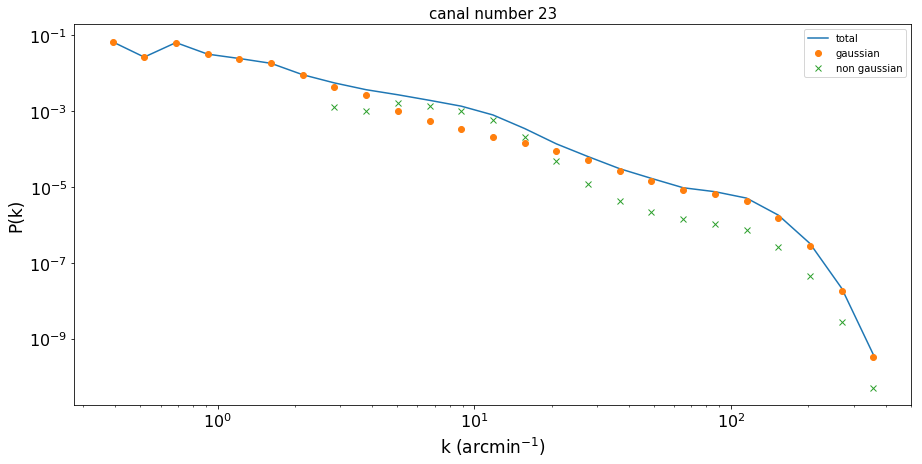

In [186]:
params = {'axes.labelsize' : 17, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16}
plt.rcParams.update(params)
affiche(23)

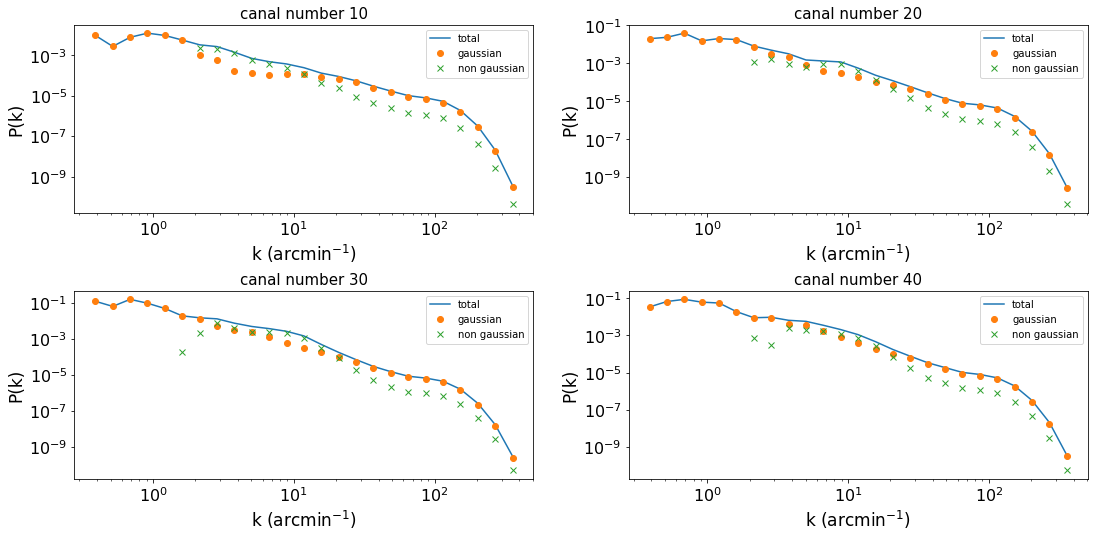

In [187]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(w_pad =5, h_pad = 5)

subplot(2,2,1)
affiche(10)

subplot(2,2,2)
affiche(20)

subplot(2,2,3)
affiche(30)

subplot(2,2,4)
affiche(40)

***
# Coupe avec pvextractor

In [67]:
from pvextractor import Path
from pvextractor import extract_pv_slice
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic

In [68]:
filname = "/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng.fits"
HDU = fits.open(filname)
cube = HDU[0].data
header = HDU[0].header

In [69]:
w = wcs.WCS(header)

if w.wcs.has_crota() == True:
    del header['CROTA1']
    del header['CROTA2']


w = wcs.WCS(header)

***
## Représentation des 4 premier coeur

In [70]:
c1 = SkyCoord('18:47:47.02 -1:54:26.86', unit=(u.hourangle, u.deg))
sky1 = w.world_to_pixel(c1,9.31491784e+10*u.Hz)[0:2]

c2 = SkyCoord('18:47:46.84 -1:54:29.30', unit=(u.hourangle, u.deg))
sky2 = w.world_to_pixel(c2,9.31491784e+10*u.Hz)[0:2]

c3 = SkyCoord('18:47:46.37 -1:54:33.41', unit=(u.hourangle, u.deg))
sky3 = w.world_to_pixel(c3,9.31491784e+10*u.Hz)[0:2]

c4 = SkyCoord('18:47:46.98 -1:54:26.42', unit=(u.hourangle, u.deg))
sky4 = w.world_to_pixel(c4,9.31491784e+10*u.Hz)[0:2]

Text(0.5, 1.0, 'moment 0 coherent')

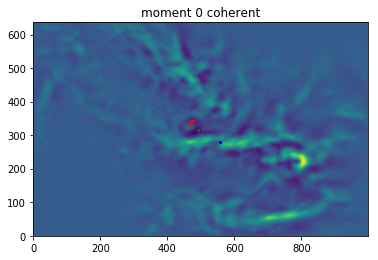

In [37]:
imshow(im_ng_int.real,origin="lower")
plt.scatter(int(sky4[0]), int(sky4[1]), s=5, c='r', marker='o')
plt.scatter(int(sky3[0]), int(sky3[1]), s=5, c='b', marker='o')
plt.scatter(int(sky2[0]), int(sky2[1]), s=5, c='g', marker='o')
plt.scatter(int(sky1[0]), int(sky1[1]), s=5, c='r', marker='o')
title('moment 0 coherent')

***
## coupe 1

In [105]:
filname = "/user/workdir/soldanof/data/w43_7_12_iso_cnts/ng.fits"
HDU = fits.open(filname)
data = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)

if w.wcs.has_crota() == True:
	del header['CROTA1']
	del header['CROTA2']
	del header['CROTA3']

w = wcs.WCS(header)

#Slice extraction

p1 = SkyCoord('18:47:48.706 -1:54:06.057', unit=(u.hourangle, u.deg))
skyp1 = w.world_to_pixel(p1,9.31491784e+10*u.Hz)[0:2]
x1= int(skyp1[0])
y1= int(skyp1[1])

p2 = SkyCoord('18:47:46.957 -1:53:48.464', unit=(u.hourangle, u.deg))
skyp2 = w.world_to_pixel(p2,9.31491784e+10*u.Hz)[0:2]
x2= int(skyp2[0])
y2= 630

pt = [(x1,y1),(478,y2)]
print(pt)
width = 10

path = Path(pt, width=width)
pv_diag = extract_pv_slice(data[15:48,:,:], path, wcs=w)

[(239, 527), (478, 630)]



INFO: Auto-setting vmin to -1.061e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.730e-02 [aplpy.core]


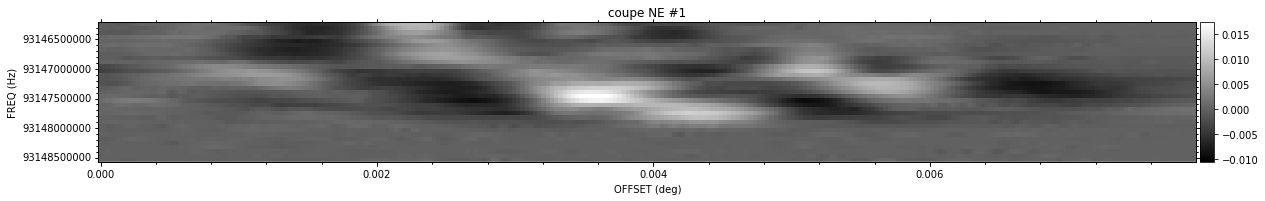

In [106]:
fig_vel = plt.figure(6,figsize=(20,20))
f3 = aplpy.FITSFigure(pv_diag,figure=fig_vel)
f3.show_colorscale(cmap='gray')
f3.set_title("coupe NE #1")
f3.add_colorbar()

Text(0.5, 1.0, 'moment 1 coherent')

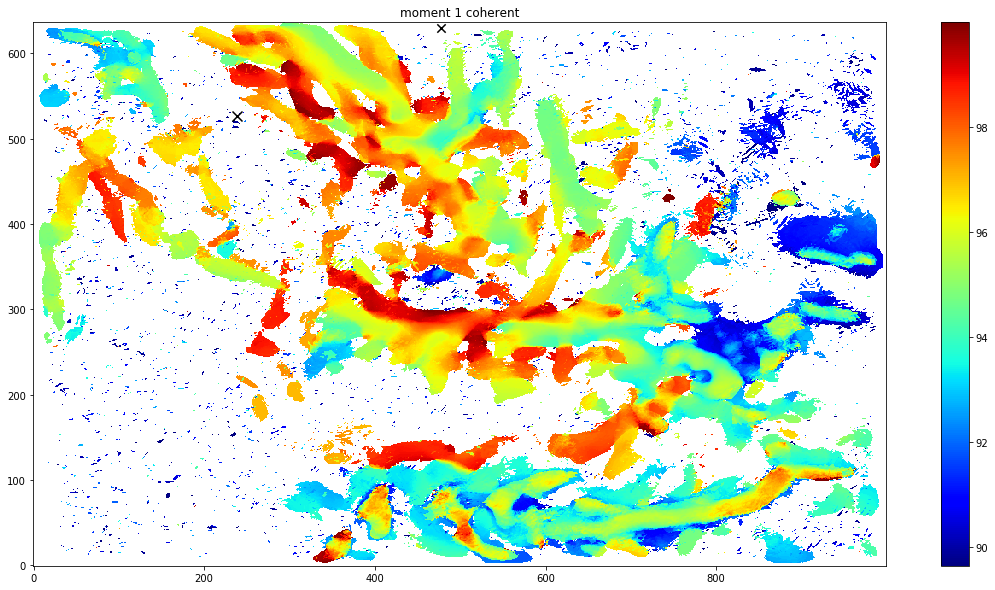

In [107]:
figure(figsize=(20,10))
filname = "/user/workdir/soldanof/data/w43_7_12_iso_cnts/moment1_w43_7_12_isolat_mean_M3_pos.fits"
HDU = fits.open(filname)
moment1 = HDU[0].data
imshow(moment1,origin="lower",cmap='jet')
colorbar()
plt.scatter(x1, y1, s=100, c='k', marker='x')
plt.scatter(x2, y2, s=70, c='k', marker='x')

title('moment 1 coherent')

***
# Fit des spectres de puissances avant corection du beam

In [89]:
def f1(x,a,b):
    return b*(x**a)

In [143]:
def func(x,a,b):
    return a*x+b

In [147]:
nbr = 20
popt, pcov = curve_fit(func, np.log(w_k[10:-6]), np.log(ng[nbr][10:-6]))
print(popt)

[-3.30403736 -0.09306769]


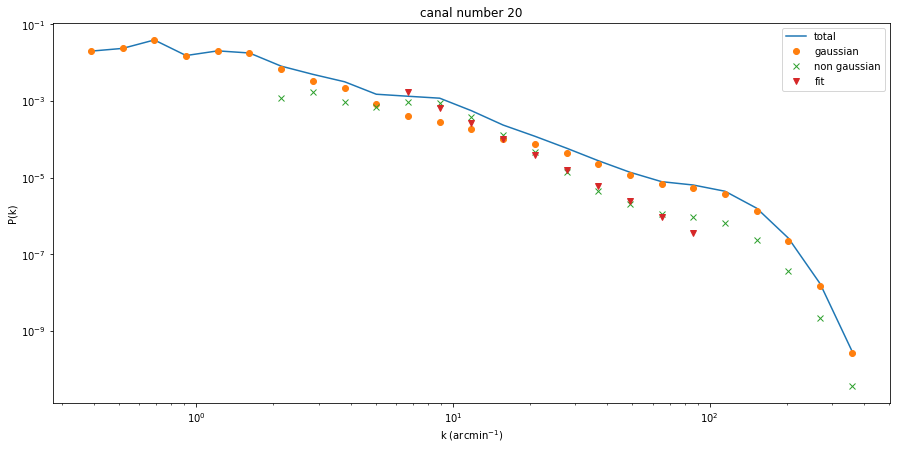

In [148]:
affiche(nbr)
plt.plot(w_k[10:-5],f1(w_k,popt[0],np.exp(popt[1]))[10:-5],"v",label="fit")
legend()

In [152]:
puiss_t = []
puiss_g = []
puiss_ng = []

N = header['NAXIS3']
for i in range(N) :
    popt, pcov = curve_fit(func, np.log(w_k[7:-4]), np.log(t[i][7:-4]))
    puiss_t.append(popt[0])
    
    popt, pcov = curve_fit(func, np.log(w_k[7:-4]), np.log(g[i][7:-4]))
    puiss_g.append(popt[0])
    
    popt, pcov = curve_fit(func, np.log(w_k[10:-6]), np.log(ng[i][10:-6]))
    puiss_ng.append(popt[0])

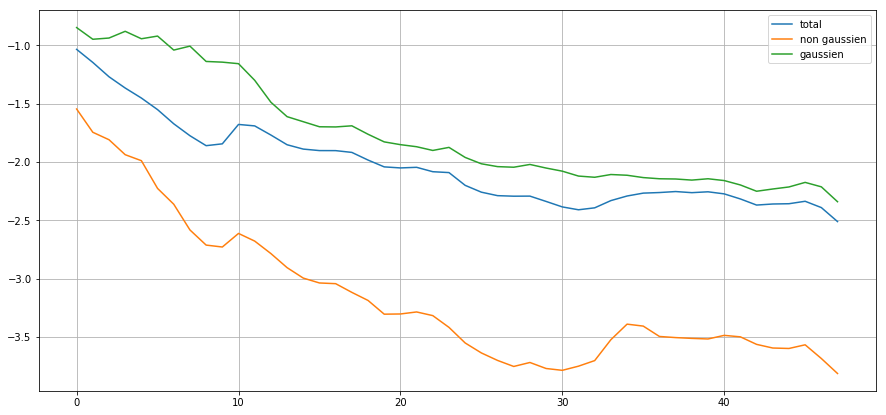

In [153]:
figure(figsize(15,7))
plot(puiss_t,label="total")
plot(puiss_ng,label="non gaussien")
plot(puiss_g,label="gaussien")
legend()
grid()